In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


Load the mnist data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
X = x_train.reshape(60000,28,28,1).astype('float32') /255
test_X = x_test.reshape(10000,28,28,1).astype('float32') /255
Y = to_categorical(y_train)
test_Y = to_categorical(y_test)

In [5]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [7]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

Create training and validation data

In [8]:
seed = 0
np.random.seed(seed)            
m = len(X)                  # number of training examples
minibatch_size = 10000
# Shuffle (X, Y)
permutation = list(np.random.permutation(m))
shuffled_X = X[permutation, :]
shuffled_Y = Y[permutation, :]

# Create minibatch
minibatch_train_X = shuffled_X[minibatch_size : 2*minibatch_size, :]
minibatch_train_Y = shuffled_Y[minibatch_size : 2*minibatch_size, :]
minibatch_valid_X = shuffled_X[2*minibatch_size : 3*minibatch_size, :]
minibatch_valid_Y = shuffled_Y[2*minibatch_size : 3*minibatch_size, :]

In [9]:
print(minibatch_train_X.shape, minibatch_train_Y.shape)
print(minibatch_valid_X.shape, minibatch_valid_Y.shape)

(10000, 28, 28, 1) (10000, 10)
(10000, 28, 28, 1) (10000, 10)


# CNN Architectures

Here I have analyzed varying cnn architectures

In [44]:
def init_model_cnn1():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=None))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])
    return model

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 97s - loss: 0.7870 - acc: 0.7515 - val_loss: 0.2348 - val_acc: 0.9328
Epoch 2/20
 - 95s - loss: 0.2598 - acc: 0.9200 - val_loss: 0.1414 - val_acc: 0.9569
Epoch 3/20
 - 94s - loss: 0.1811 - acc: 0.9450 - val_loss: 0.0948 - val_acc: 0.9709
Epoch 4/20
 - 87s - loss: 0.1233 - acc: 0.9621 - val_loss: 0.0813 - val_acc: 0.9743
Epoch 5/20
 - 88s - loss: 0.1003 - acc: 0.9689 - val_loss: 0.0760 - val_acc: 0.9763
Epoch 6/20
 - 93s - loss: 0.0793 - acc: 0.9756 - val_loss: 0.0726 - val_acc: 0.9786
Epoch 7/20
 - 77s - loss: 0.0631 - acc: 0.9804 - val_loss: 0.0662 - val_acc: 0.9800
Epoch 8/20
 - 87s - loss: 0.0541 - acc: 0.9809 - val_loss: 0.0657 - val_acc: 0.9796
Epoch 9/20
 - 91s - loss: 0.0483 - acc: 0.9842 - val_loss: 0.0653 - val_acc: 0.9810
Epoch 10/20
 - 93s - loss: 0.0455 - acc: 0.9843 - val_loss: 0.0650 - val_acc: 0.9816
Epoch 11/20
 - 89s - loss: 0.0390 - acc: 0.9871 - val_loss: 0.0632 - val_acc: 0.9830
Epoch 12/20
 - 81s - los

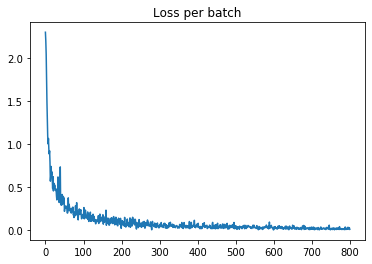

In [45]:
model = init_model_cnn1()
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

In [48]:
def init_model_cnn2():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),
                    activation='tanh',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=None))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['accuracy'])
    return model

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 22s - loss: 0.8690 - acc: 0.7250 - val_loss: 0.3116 - val_acc: 0.9081
Epoch 2/20
 - 21s - loss: 0.3703 - acc: 0.8874 - val_loss: 0.2259 - val_acc: 0.9336
Epoch 3/20
 - 23s - loss: 0.2711 - acc: 0.9169 - val_loss: 0.1760 - val_acc: 0.9453
Epoch 4/20
 - 24s - loss: 0.2160 - acc: 0.9334 - val_loss: 0.1449 - val_acc: 0.9551
Epoch 5/20
 - 21s - loss: 0.1871 - acc: 0.9443 - val_loss: 0.1286 - val_acc: 0.9615
Epoch 6/20
 - 21s - loss: 0.1468 - acc: 0.9543 - val_loss: 0.1183 - val_acc: 0.9639
Epoch 7/20
 - 21s - loss: 0.1308 - acc: 0.9602 - val_loss: 0.1118 - val_acc: 0.9654
Epoch 8/20
 - 21s - loss: 0.1117 - acc: 0.9654 - val_loss: 0.1048 - val_acc: 0.9685
Epoch 9/20
 - 21s - loss: 0.1029 - acc: 0.9666 - val_loss: 0.1006 - val_acc: 0.9687
Epoch 10/20
 - 21s - loss: 0.0888 - acc: 0.9735 - val_loss: 0.1044 - val_acc: 0.9689
Epoch 11/20
 - 21s - loss: 0.0728 - acc: 0.9757 - val_loss: 0.0919 - val_acc: 0.9719
Epoch 12/20
 - 21s - los

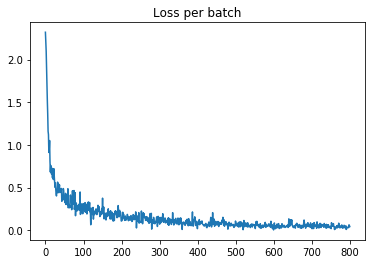

In [49]:
model = init_model_cnn2()
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Increasing the number of layers has resulted in a slower performance. Each epoch took a long time to be completed. However the accuracy increased so that is an advantage. A negligible overfitting might be present but that may be due to small size of dataset. In the second model we have used tanh as our activation function. Since the number of units were decreased, we received a faster result. The accuracy wasn't much affected probably due to small data size. achieved an accuracy of ~98% in both cases.

# Optimizers

Here I have checked the result of CNN using various optimizers

In [10]:
def init_model_optimizer(optimized):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=None))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimized,
              metrics=['accuracy'])
    return model

In [13]:
optimizer_Adadelta = keras.optimizers.Adadelta()
optimizer_rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
optimizer_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

Using Ada Delta optimizer






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 29s - loss: 1.0575 - acc: 0.6519 - val_loss: 0.3837 - val_acc: 0.8926
Epoch 2/20
 - 26s - loss: 0.3818 - acc: 0.8833 - val_loss: 0.3091 - val_acc: 0.9013
Epoch 3/20
 - 26s - loss: 0.2474 - acc: 0.9260 - val_loss: 0.2498 - val_acc: 0.9242
Epoch 4/20
 - 27s - loss: 0.1953 - acc: 0.9434 - val_loss: 0.2966 - val_acc: 0.9068
Epoch 5/20
 - 25s - loss: 0.1614 - acc: 0.9528 - val_loss: 0.1278 - val_acc: 0.9599
Epoch 6/20
 - 28s - loss: 0.1289 - acc: 0.9603 - val_loss: 0.1441 - val_acc: 0.9542
Epoch 7/20
 - 26s - loss: 0.1164 - acc: 0.9649 - val_loss: 0.0937 - val_acc: 0.9703
Epoch 8/20
 - 25s - loss: 0.1016 - acc: 0.9681 - val_loss: 0.0825 - val_acc: 0.9731
Epoch 9/20
 - 27s - loss: 0.0845 - acc: 0.9733 - val_loss: 0.1

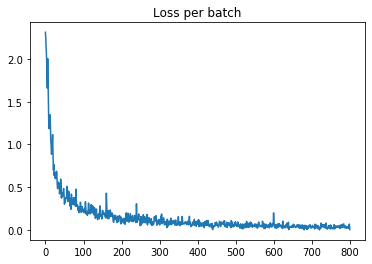

In [14]:
model = init_model_optimizer(optimizer_Adadelta)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Using RMS Prop Optimizer

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 0.7893 - acc: 0.7492 - val_loss: 0.2512 - val_acc: 0.9307
Epoch 2/20
 - 27s - loss: 0.2612 - acc: 0.9175 - val_loss: 0.1469 - val_acc: 0.9538
Epoch 3/20
 - 26s - loss: 0.1826 - acc: 0.9472 - val_loss: 0.1716 - val_acc: 0.9461
Epoch 4/20
 - 26s - loss: 0.1379 - acc: 0.9606 - val_loss: 0.1495 - val_acc: 0.9509
Epoch 5/20
 - 27s - loss: 0.1122 - acc: 0.9658 - val_loss: 0.0843 - val_acc: 0.9740
Epoch 6/20
 - 26s - loss: 0.0883 - acc: 0.9718 - val_loss: 0.0899 - val_acc: 0.9719
Epoch 7/20
 - 26s - loss: 0.0749 - acc: 0.9765 - val_loss: 0.0719 - val_acc: 0.9771
Epoch 8/20
 - 28s - loss: 0.0648 - acc: 0.9793 - val_loss: 0.0724 - val_acc: 0.9759
Epoch 9/20
 - 26s - loss: 0.0560 - acc: 0.9821 - val_loss: 0.0921 - val_acc: 0.9711
Epoch 10/20
 - 26s - loss: 0.0490 - acc: 0.9840 - val_loss: 0.0703 - val_acc: 0.9776
Epoch 11/20
 - 26s - loss: 0.0435 - acc: 0.9861 - val_loss: 0.0589 - val_acc: 0.9827
Epoch 12/20
 - 26s - los

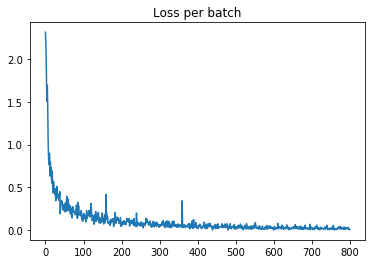

In [15]:
model = init_model_optimizer(optimizer_rms)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Using Adam Optimizer

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 0.8864 - acc: 0.7213 - val_loss: 0.2719 - val_acc: 0.9184
Epoch 2/20
 - 27s - loss: 0.3363 - acc: 0.9000 - val_loss: 0.1678 - val_acc: 0.9498
Epoch 3/20
 - 25s - loss: 0.2193 - acc: 0.9355 - val_loss: 0.1260 - val_acc: 0.9614
Epoch 4/20
 - 21s - loss: 0.1669 - acc: 0.9516 - val_loss: 0.1062 - val_acc: 0.9655
Epoch 5/20
 - 26s - loss: 0.1331 - acc: 0.9595 - val_loss: 0.0907 - val_acc: 0.9725
Epoch 6/20
 - 26s - loss: 0.1039 - acc: 0.9681 - val_loss: 0.0808 - val_acc: 0.9751
Epoch 7/20
 - 26s - loss: 0.0942 - acc: 0.9714 - val_loss: 0.0825 - val_acc: 0.9747
Epoch 8/20
 - 26s - loss: 0.0844 - acc: 0.9747 - val_loss: 0.0745 - val_acc: 0.9779
Epoch 9/20
 - 26s - loss: 0.0717 - acc: 0.9772 - val_loss: 0.0770 - val_acc: 0.9768
Epoch 10/20
 - 26s - loss: 0.0701 - acc: 0.9789 - val_loss: 0.0738 - val_acc: 0.9781
Epoch 11/20
 - 27s - loss: 0.0571 - acc: 0.9817 - val_loss: 0.0705 - val_acc: 0.9788
Epoch 12/20
 - 26s - los

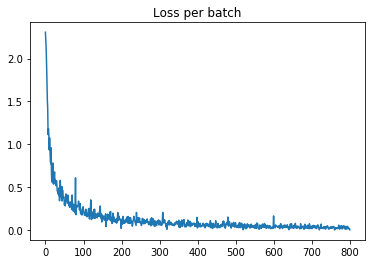

In [16]:
model = init_model_optimizer(optimizer_adam)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

We see the results of the optimizers.
Ada Grad gives a training accuracy of 98.61% and a testing accuracy of 98.3%

RMS Prop gives a training accuracy of 99.48% and a testing accuracy of 98.52%.

Adam gives a training accuracy of 99.09% and a testing accuracy of 98.38%

Overall there is not a much difference in training a testing accuracy considering the size of data chosen was 10000. Also the high values of accuracy indicates that our optimizers has performed really well. 

# Regularization

Here I have checked the effect of regularization of parameters

Here parameter regularization is performed using dropout.

In [28]:
def init_model_regulate_Drop(drop_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=None))
    model.add(Dropout(drop_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])
    return model

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 27s - loss: 2.2741 - acc: 0.1614 - val_loss: 2.2169 - val_acc: 0.4525
Epoch 2/20
 - 26s - loss: 2.1569 - acc: 0.2876 - val_loss: 1.9859 - val_acc: 0.6189
Epoch 3/20
 - 24s - loss: 1.8474 - acc: 0.4198 - val_loss: 1.4287 - val_acc: 0.7012
Epoch 4/20
 - 23s - loss: 1.4311 - acc: 0.5496 - val_loss: 0.9528 - val_acc: 0.7816
Epoch 5/20
 - 24s - loss: 1.1488 - acc: 0.6253 - val_loss: 0.7147 - val_acc: 0.8416
Epoch 6/20
 - 24s - loss: 1.0041 - acc: 0.6756 - val_loss: 0.6297 - val_acc: 0.8274
Epoch 7/20
 - 23s - loss: 0.9189 - acc: 0.7051 - val_loss: 0.5077 - val_acc: 0.8665
Epoch 8/20
 - 23s - loss: 0.8322 - acc: 0.7327 - val_loss: 0.4903 - val_acc: 0.8613
Epoch 9/20
 - 23s - loss: 0.7787 - acc: 0.7548 - val_loss: 0.4787 - val_acc: 0.8676
Epoch 10/20
 - 23s - loss: 0.7488 - acc: 0.7659 - val_loss: 0.4171 - val_acc: 0.8791
Epoch 11/20
 - 23s - loss: 0.7141 - acc: 0.7746 - val_loss: 0.4579 - val_acc: 0.8674
Epoch 12/20
 - 22s - los

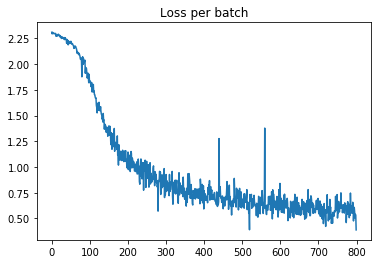

In [29]:
model = init_model_regulate_Drop(0.7)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 27s - loss: 2.2444 - acc: 0.2151 - val_loss: 2.1498 - val_acc: 0.4416
Epoch 2/20
 - 22s - loss: 2.0088 - acc: 0.4039 - val_loss: 1.6899 - val_acc: 0.6304
Epoch 3/20
 - 23s - loss: 1.4411 - acc: 0.5833 - val_loss: 0.9600 - val_acc: 0.7668
Epoch 4/20
 - 25s - loss: 0.9799 - acc: 0.6953 - val_loss: 0.6144 - val_acc: 0.8447
Epoch 5/20
 - 23s - loss: 0.7919 - acc: 0.7477 - val_loss: 0.5551 - val_acc: 0.8570
Epoch 6/20
 - 23s - loss: 0.6915 - acc: 0.7816 - val_loss: 0.4873 - val_acc: 0.8499
Epoch 7/20
 - 23s - loss: 0.6406 - acc: 0.7962 - val_loss: 0.4550 - val_acc: 0.8611
Epoch 8/20
 - 23s - loss: 0.5951 - acc: 0.8145 - val_loss: 0.4526 - val_acc: 0.8600
Epoch 9/20
 - 23s - loss: 0.5642 - acc: 0.8253 - val_loss: 0.4360 - val_acc: 0.8690
Epoch 10/20
 - 22s - loss: 0.5375 - acc: 0.8324 - val_loss: 0.3601 - val_acc: 0.8949
Epoch 11/20
 - 24s - loss: 0.5123 - acc: 0.8437 - val_loss: 0.3524 - val_acc: 0.8938
Epoch 12/20
 - 23s - los

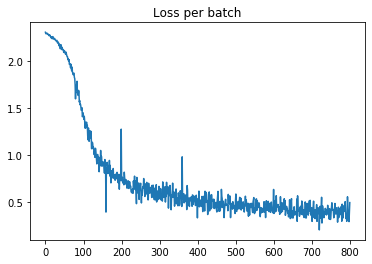

In [37]:
model = init_model_regulate_Drop(0.5)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Higher dropout rate i.e. lower keep probability provided us with slightly better results. But the dropout rate shouldn't be increased too much or decreased to very low values as that may result in poor performance. Dropout rate of 0 is a normal feed forward neural network and dropout rate of 1 means no parameters are available. So a balanced rate should be selected.

Here the L2 parameter regularization is used

In [35]:
def init_model_regulate_L2(lambda1):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(lambda1)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])
    return model

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 27s - loss: 101.4359 - acc: 0.3284 - val_loss: 59.8190 - val_acc: 0.4958
Epoch 2/20
 - 25s - loss: 39.8417 - acc: 0.6157 - val_loss: 23.8546 - val_acc: 0.5522
Epoch 3/20
 - 25s - loss: 15.9397 - acc: 0.7408 - val_loss: 9.6722 - val_acc: 0.6998
Epoch 4/20
 - 24s - loss: 6.5273 - acc: 0.8122 - val_loss: 4.3205 - val_acc: 0.6844
Epoch 5/20
 - 24s - loss: 3.0365 - acc: 0.8074 - val_loss: 3.0121 - val_acc: 0.5482
Epoch 6/20
 - 25s - loss: 1.7557 - acc: 0.7922 - val_loss: 1.8017 - val_acc: 0.6475
Epoch 7/20
 - 25s - loss: 1.1957 - acc: 0.8194 - val_loss: 1.1419 - val_acc: 0.7675
Epoch 8/20
 - 25s - loss: 0.9855 - acc: 0.8069 - val_loss: 1.0256 - val_acc: 0.7695
Epoch 9/20
 - 25s - loss: 0.9362 - acc: 0.8074 - val_loss: 1.2864 - val_acc: 0.6704
Epoch 10/20
 - 25s - loss: 0.9400 - acc: 0.8014 - val_loss: 1.7535 - val_acc: 0.4845
Epoch 11/20
 - 25s - loss: 0.8892 - acc: 0.8184 - val_loss: 1.3835 - val_acc: 0.6439
Epoch 12/20
 - 25s

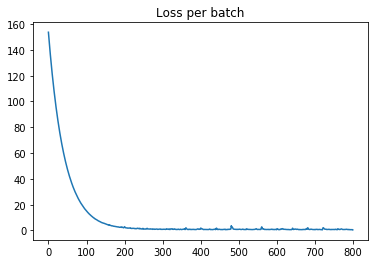

In [36]:
model = init_model_regulate_L2(0.6)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 4.7520 - acc: 0.3560 - val_loss: 4.6611 - val_acc: 0.4974
Epoch 2/20
 - 25s - loss: 4.4717 - acc: 0.6575 - val_loss: 4.1174 - val_acc: 0.7318
Epoch 3/20
 - 24s - loss: 3.5804 - acc: 0.7846 - val_loss: 3.2202 - val_acc: 0.7465
Epoch 4/20
 - 25s - loss: 2.9876 - acc: 0.8466 - val_loss: 2.9598 - val_acc: 0.8296
Epoch 5/20
 - 25s - loss: 2.8226 - acc: 0.8705 - val_loss: 2.9491 - val_acc: 0.7922
Epoch 6/20
 - 25s - loss: 2.7382 - acc: 0.8770 - val_loss: 3.0966 - val_acc: 0.7461
Epoch 7/20
 - 25s - loss: 2.6826 - acc: 0.8822 - val_loss: 2.7126 - val_acc: 0.8607
Epoch 8/20
 - 24s - loss: 2.6172 - acc: 0.8915 - val_loss: 2.6012 - val_acc: 0.8893
Epoch 9/20
 - 25s - loss: 2.5581 - acc: 0.9009 - val_loss: 2.6765 - val_acc: 0.8426
Epoch 10/20
 - 25s - loss: 2.5161 - acc: 0.9007 - val_loss: 2.5060 - val_acc: 0.8971
Epoch 11/20
 - 25s - loss: 2.4653 - acc: 0.9088 - val_loss: 2.4733 - val_acc: 0.8961
Epoch 12/20
 - 25s - los

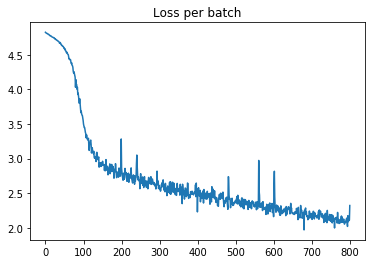

In [38]:
model = init_model_regulate_L2(0.01)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

We find that L2 performs much better with a higher value of lambda(0.6) rather than a lower value(0.01). The accuracy decreased from almost 88% to 77%

# Hyperparameters

Here I have checked the model for various learning rate, beta1 and beta2.

In [39]:
def init_model_hyper(alpha, beta1, beta2):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=None))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=alpha, beta_1=beta1, beta_2=beta2, amsgrad=False),
              metrics=['accuracy'])
    return model

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 0.6580 - acc: 0.8004 - val_loss: 0.1411 - val_acc: 0.9591
Epoch 2/20
 - 27s - loss: 0.1799 - acc: 0.9445 - val_loss: 0.0966 - val_acc: 0.9707
Epoch 3/20
 - 27s - loss: 0.1301 - acc: 0.9589 - val_loss: 0.1205 - val_acc: 0.9633
Epoch 4/20
 - 26s - loss: 0.1044 - acc: 0.9686 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 5/20
 - 25s - loss: 0.1025 - acc: 0.9672 - val_loss: 0.0826 - val_acc: 0.9755
Epoch 6/20
 - 26s - loss: 0.0863 - acc: 0.9734 - val_loss: 0.0721 - val_acc: 0.9790
Epoch 7/20
 - 26s - loss: 0.0664 - acc: 0.9785 - val_loss: 0.0688 - val_acc: 0.9801
Epoch 8/20
 - 26s - loss: 0.0607 - acc: 0.9799 - val_loss: 0.0773 - val_acc: 0.9797
Epoch 9/20
 - 26s - loss: 0.0527 - acc: 0.9832 - val_loss: 0.0671 - val_acc: 0.9812
Epoch 10/20
 - 26s - loss: 0.0481 - acc: 0.9832 - val_loss: 0.0629 - val_acc: 0.9831
Epoch 11/20
 - 26s - loss: 0.0585 - acc: 0.9820 - val_loss: 0.0741 - val_acc: 0.9827
Epoch 12/20
 - 26s - los

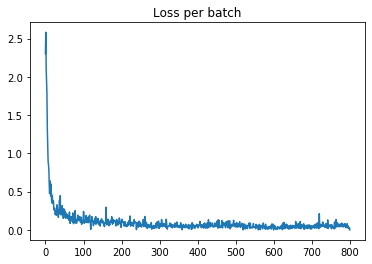

In [40]:
model = init_model_hyper(0.01, 0.9, 0.999)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 14.2368 - acc: 0.0976 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 2/20
 - 27s - loss: 14.5289 - acc: 0.0986 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 3/20
 - 26s - loss: 14.4918 - acc: 0.1009 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 4/20
 - 25s - loss: 14.6127 - acc: 0.0934 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 5/20
 - 26s - loss: 14.5804 - acc: 0.0954 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 6/20
 - 26s - loss: 14.5966 - acc: 0.0944 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 7/20
 - 26s - loss: 14.5869 - acc: 0.0950 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 8/20
 - 25s - loss: 14.5595 - acc: 0.0967 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 9/20
 - 26s - loss: 14.5224 - acc: 0.0990 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 10/20
 - 25s - loss: 14.5627 - acc: 0.0965 - val_loss: 14.5643 - val_acc: 0.0964
Epoch 11/20
 - 25s - loss: 14.5804 - acc: 0.0954 - val_loss: 14.5643 - val_acc: 0.0964
Ep

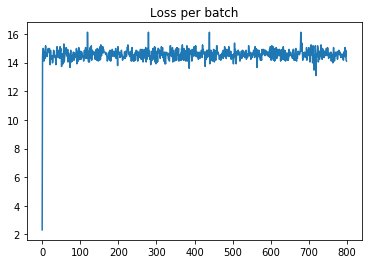

In [41]:
model = init_model_hyper(0.8, 0.9, 0.999)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 29s - loss: 1.0851 - acc: 0.6862 - val_loss: 0.3521 - val_acc: 0.8799
Epoch 2/20
 - 25s - loss: 0.2248 - acc: 0.9321 - val_loss: 0.1210 - val_acc: 0.9626
Epoch 3/20
 - 22s - loss: 0.2523 - acc: 0.9264 - val_loss: 0.2450 - val_acc: 0.9281
Epoch 4/20
 - 25s - loss: 0.1388 - acc: 0.9567 - val_loss: 0.1835 - val_acc: 0.9484
Epoch 5/20
 - 27s - loss: 0.1053 - acc: 0.9660 - val_loss: 0.1260 - val_acc: 0.9669
Epoch 6/20
 - 27s - loss: 0.0831 - acc: 0.9733 - val_loss: 0.0781 - val_acc: 0.9767
Epoch 7/20
 - 27s - loss: 0.0726 - acc: 0.9773 - val_loss: 0.0717 - val_acc: 0.9786
Epoch 8/20
 - 26s - loss: 0.0605 - acc: 0.9810 - val_loss: 0.0795 - val_acc: 0.9794
Epoch 9/20
 - 27s - loss: 0.0540 - acc: 0.9801 - val_loss: 0.0745 - val_acc: 0.9812
Epoch 10/20
 - 27s - loss: 0.0486 - acc: 0.9835 - val_loss: 0.0908 - val_acc: 0.9785
Epoch 11/20
 - 25s - loss: 0.0649 - acc: 0.9788 - val_loss: 0.0804 - val_acc: 0.9801
Epoch 12/20
 - 26s - los

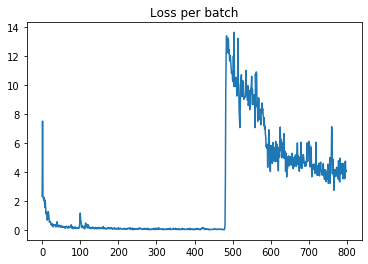

In [42]:
model = init_model_hyper(0.01, 0.01, 0.999)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
 - 29s - loss: 5.5414 - acc: 0.4589 - val_loss: 14.2049 - val_acc: 0.1187
Epoch 2/20
 - 26s - loss: 14.3999 - acc: 0.1066 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 3/20
 - 26s - loss: 14.4676 - acc: 0.1024 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 4/20
 - 26s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 5/20
 - 25s - loss: 14.3806 - acc: 0.1078 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 6/20
 - 26s - loss: 14.4757 - acc: 0.1019 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 7/20
 - 26s - loss: 14.4660 - acc: 0.1025 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 8/20
 - 26s - loss: 14.4660 - acc: 0.1025 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 9/20
 - 26s - loss: 14.5385 - acc: 0.0980 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 10/20
 - 27s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.5401 - val_acc: 0.0979
Epoch 11/20
 - 25s - loss: 14.5208 - acc: 0.0991 - val_loss: 14.5401 - val_acc: 0.0979
Epo

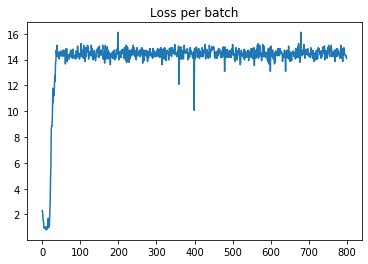

In [43]:
model = init_model_hyper(0.01, 0.9, 0.1)
history = LossHistory()
model.fit(minibatch_train_X, minibatch_train_Y, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(minibatch_valid_X, minibatch_valid_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=16)
print(score)
plot_losses(history.losses)

We found that increasing the learning rate too much made the model perform horribly. In the first case alpha was 0.01 and the accuracy of ~98% was achieved. High value of beta1 and beta2 is preferred. Low beta1 and high beta2 results in poor performance. Similar results for high beta1 and low beta 2. However, in general overfitting is not observed.